In [36]:

import glob
import os
import os.path
import time 
import getpass
import pathlib

import pandas as pd
import category_encoders as ce

from sklearn.preprocessing import LabelEncoder
labelencoder_X=LabelEncoder()

## Reading Files from Input Directory

In [84]:
file_attr = []
for name in glob.glob("./doc_sim/input/*"):
    
    print (name)
    x=pathlib.PurePosixPath(name).suffix
#     print (" ")
    username=getpass.getuser()
#     print("FileType:",x)   
#     print("Size:",os.path.getsize(name))
#     print('Access time  :', time.ctime(os.path.getatime(name)))
#     print('Modified time:', time.ctime(os.path.getmtime(name)))
#     print("Modified By:",username)
#     print(" ")

    head, tail = os.path.split(name)
    print("FileName:", tail)
#     print("FilePath:", head)
    name_ = tail.replace(x,' ')
#     print(name_)
    print (" ")

    temp_list =  [tail,head,name_,x,os.path.getsize(name), time.ctime(os.path.getatime(name)),time.ctime(os.path.getmtime(name)),username]
#     temp_list =  [head,name_,x,os.path.getsize(name), time.ctime(os.path.getatime(name)),time.ctime(os.path.getmtime(name)),username]
    
    file_attr.append(temp_list)
    

./doc_sim/input/WDSI.WDSIDT2ShowcaseXI.docx
FileName: WDSI.WDSIDT2ShowcaseXI.docx
 
./doc_sim/input/WDSI.WDSIDT2ShowcaseXI.pdf
FileName: WDSI.WDSIDT2ShowcaseXI.pdf
 
./doc_sim/input/WSWB.showcaseXI.docx
FileName: WSWB.showcaseXI.docx
 


## Extracting File's Properties

In [95]:
df = pd.DataFrame(file_attr,columns = ['name','path','name_','filetype','size','accesstime','modifiedtime','modifiedby'])
# df = pd.DataFrame(file_attr,columns = ['path','name_','filetype','size','accesstime','modifiedtime','mdifiedby'])
df_name = df.name

df

,name,path,name_,filetype,size,accesstime,modifiedtime,modifiedby
0,WDSI.WDSIDT2ShowcaseXI.docx,./doc_sim/input,WDSI.WDSIDT2ShowcaseXI,.docx,408619,Fri Jan 8 08:31:33 2021,Tue Jan 12 12:46:33 2021,dsuser
1,WDSI.WDSIDT2ShowcaseXI.pdf,./doc_sim/input,WDSI.WDSIDT2ShowcaseXI,.pdf,72452,Fri Jan 8 08:31:33 2021,Tue Jan 12 12:46:33 2021,dsuser
2,WSWB.showcaseXI.docx,./doc_sim/input,WSWB.showcaseXI,.docx,408251,Fri Jan 8 08:31:34 2021,Tue Jan 12 12:46:33 2021,dsuser


In [96]:
df.drop(['accesstime','modifiedtime','modifiedby','path','name'],axis= 1,inplace=True)

## Converting into categorical dataset

In [97]:
for i in df.columns:
#     print(i)
    df[i] = df[i].astype('category').cat.codes

In [98]:
df

,name_,filetype,size
0,0,0,2
1,0,1,0
2,1,0,1


In [99]:
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# df = pd.DataFrame(scaler.fit_transform(df))
# df

##  Corelation to Estimate Similarities

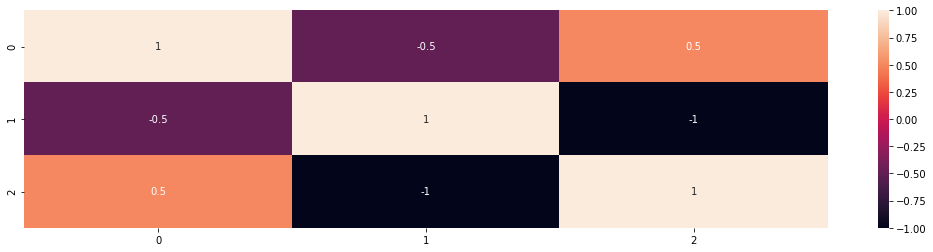

In [100]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

f = plt.figure(figsize=(18, 4))

corrMatrix = df.T.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

In [35]:
data_cor = df.T.corr(method = 'pearson')
print(data_cor)
data_cor = data_cor*5
data_cor = data_cor.round(2)
data_cor = data_cor.mask(data_cor < 0, 0)
print(data_cor)

     0    1    2
0  1.0 -0.5  0.5
1 -0.5  1.0 -1.0
2  0.5 -1.0  1.0
     0    1    2
0  5.0  0.0  2.5
1  0.0  5.0  0.0
2  2.5  0.0  5.0


In [21]:
df

,0,1,2
0,0.0,0.0,1.0
1,0.0,1.0,0.0
2,1.0,0.0,0.5


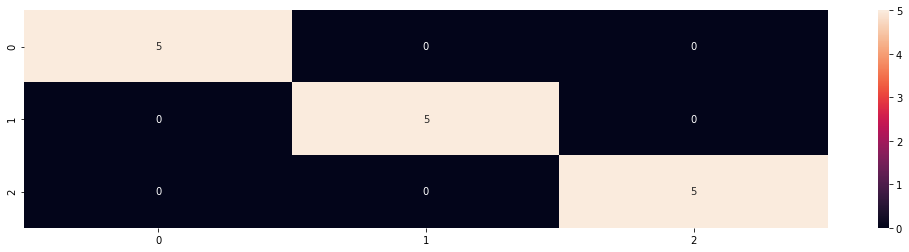

In [22]:
data_cor
f = plt.figure(figsize=(18, 4))
sn.heatmap(data_cor, annot=True)
plt.show()